In [24]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import wget

In [25]:
dataset=wget.download('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip',bar=None)


In [26]:
zip_ref=zipfile.ZipFile(dataset,'r')
zip_ref.extractall('D:/win_Downloads/cats_v_dogs')

In [40]:
try:
    os.mkdir('D:/win_Downloads/cats_v_dogs/tranining')
    os.mkdir('D:/win_Downloads/cats_v_dogs/tranining/cats/')
    os.mkdir('D:/win_Downloads/cats_v_dogs/tranining/dogs/')
    os.mkdir('D:/win_Downloads/cats_v_dogs/validation/')
    os.mkdir('D:/win_Downloads/cats_v_dogs/validation/cats/')
    os.mkdir('D:/win_Downloads/cats_v_dogs/validation/dogs/')
except OSError:
    pass

In [41]:
def split_data(source,training,testing,split_size):
    all_files=[]
    
    for file_name in os.listdir(source):
        filepath=source+file_name
        
        if os.path.getsize(filepath):
            all_files.append(file_name)
        else:
            print('{} is zero lenght, so skipping!!!'.format(file_name))
            
    n_files=len(all_files)
    split_point=int(n_files*split_size)
    
    shuffled=random.sample(all_files,n_files)
    
    train_set=shuffled[:split_point]
    test_set=shuffled[split_point:]
    
    for file in train_set:
        copyfile(source+file,training+file)
        
    for file in test_set:
        copyfile(source+file,testing+file)

In [42]:
cat_src_dir='D:/win_Downloads/cats_v_dogs/PetImages/Cat/'
dog_src_dir='D:/win_Downloads/cats_v_dogs/PetImages/Dog/'
train_cats_dir='D:/win_Downloads/cats_v_dogs/tranining/cats/'
train_dogs_dir='D:/win_Downloads/cats_v_dogs/tranining/dogs/'
valid_cats_dir='D:/win_Downloads/cats_v_dogs/validation/cats/'
valid_dogs_dir='D:/win_Downloads/cats_v_dogs/validation/dogs/'

In [43]:
split_data(cat_src_dir,train_cats_dir,valid_cats_dir,0.9)
split_data(dog_src_dir,train_dogs_dir,valid_dogs_dir,0.9)

666.jpg is zero lenght, so skipping!!!
11702.jpg is zero lenght, so skipping!!!


In [44]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(valid_cats_dir)))
print(len(os.listdir(valid_dogs_dir)))

11250
11250
1250
1250


In [60]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode='nearest')
valid_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode='nearest')

train_generator=train_datagen.flow_from_directory('D:/win_Downloads/cats_v_dogs/tranining',
                                                  target_size=(300,300),
                                                  batch_size=250,
                                                  class_mode='binary')

valid_generator=valid_datagen.flow_from_directory('D:/win_Downloads/cats_v_dogs/validation',
                                                  target_size=(300,300),
                                                  batch_size=100,
                                                  class_mode='binary')

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [63]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [64]:
history = model.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=valid_generator)

Epoch 1/2
90/90 [==============================] - 3111s 35s/step - loss: 0.7605 - acc: 0.5272 - val_loss: 0.6863 - val_acc: 0.5258
Epoch 2/2
90/90 [==============================] - 3146s 35s/step - loss: 0.6972 - acc: 0.5690 - val_loss: 0.6738 - val_acc: 0.5862


Text(0.5, 1.0, 'Training and validation loss')

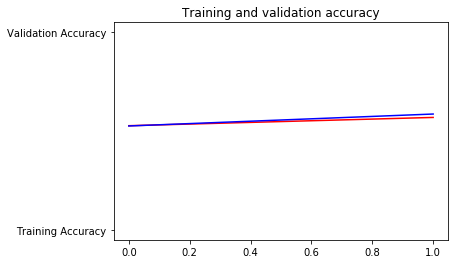

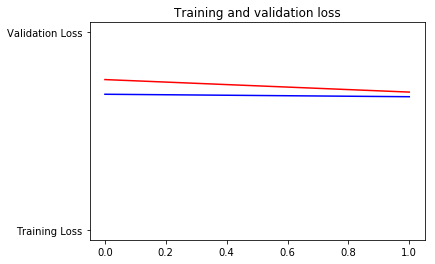

In [65]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)